# Dive into promiscuity cliffs

I was exited about  the concept of ‘promiscuity cliffs’, but I'm curious about the mechanism of it in terms of Molecular recognition.
Similarity search for Protein Data Bank was conducted to get Complex structures of Protein and promiscuity cliff compound. 

[Identification and analysis of promiscuity cliffs formed by bioactive compounds and experimental implications](http://pubs.rsc.org/en/content/articlehtml/2017/ra/c6ra27247a)


In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from IPython.display import HTML, display
from pychembldb import *

## Download PDB ligands from Ligand Expo

[Ligand expo](http://ligand-expo.rcsb.org/ld-download.html)

In [2]:
!wget http://ligand-expo.rcsb.org/dictionaries/Components-pub.sdf.gz
!gunzip Components-pub.sdf.gz

--2017-11-17 20:54:59--  http://ligand-expo.rcsb.org/dictionaries/Components-pub.sdf.gz
Resolving ligand-expo.rcsb.org... 128.6.150.17
Connecting to ligand-expo.rcsb.org|128.6.150.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14881209 (14M) [application/x-gzip]
Saving to: 'Components-pub.sdf.gz'

Components-pub.sdf. 100%[===================>]  14.19M  1.20MB/s    in 13s     

2017-11-17 20:55:13 (1.09 MB/s) - 'Components-pub.sdf.gz' saved [14881209/14881209]



## Create molecule objects and fingerprints

In [2]:
mols = [mol for mol in Chem.SDMolSupplier("Components-pub.sdf") if mol is not None]

RDKit ERROR: [09:54:08] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [09:54:08] ERROR: Could not sanitize molecule ending on line 27727
RDKit ERROR: [09:54:08] ERROR: Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [09:54:08] Explicit valence for atom # 51 O, 3, is greater than permitted
RDKit ERROR: [09:54:08] ERROR: Could not sanitize molecule ending on line 51478
RDKit ERROR: [09:54:08] ERROR: Explicit valence for atom # 51 O, 3, is greater than permitted
RDKit ERROR: [09:54:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 90 in file /Users/glandrum/anaconda/conda-bld/rdkit_1499404988161/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [09:54:08] Unexpected error hit on line 72180
RDKit ERROR: [09:54:08] ERROR: moving to the begining of the next molecule
R

RDKit ERROR: [09:54:11] ERROR: Explicit valence for atom # 5 B, 6, is greater than permitted
RDKit ERROR: [09:54:11] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [09:54:11] ERROR: Could not sanitize molecule ending on line 347087
RDKit ERROR: [09:54:11] ERROR: Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [09:54:11] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [09:54:11] ERROR: Could not sanitize molecule ending on line 361666
RDKit ERROR: [09:54:11] ERROR: Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [09:54:11] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [09:54:11] ERROR: Could not sanitize molecule ending on line 361756
RDKit ERROR: [09:54:11] ERROR: Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [09:54:11] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [09:54:11] ERROR: Could not 

RDKit ERROR: [09:54:15] ERROR: Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [09:54:15] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [09:54:15] ERROR: Could not sanitize molecule ending on line 746157
RDKit ERROR: [09:54:15] ERROR: Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [09:54:15] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [09:54:15] ERROR: Could not sanitize molecule ending on line 746329
RDKit ERROR: [09:54:15] ERROR: Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [09:54:15] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [09:54:15] ERROR: Could not sanitize molecule ending on line 762574
RDKit ERROR: [09:54:15] ERROR: Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [09:54:15] Explicit valence for atom # 0 Na, 3, is greater than permitted
RDKit ERROR: [09:54:15] ERROR: Cou

RDKit ERROR: [09:54:16] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [09:54:16] ERROR: Could not sanitize molecule ending on line 894071
RDKit ERROR: [09:54:16] ERROR: Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [09:54:16] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:54:16] ERROR: Could not sanitize molecule ending on line 894720
RDKit ERROR: [09:54:16] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:54:16] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [09:54:16] ERROR: Could not sanitize molecule ending on line 895058
RDKit ERROR: [09:54:16] ERROR: Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [09:54:16] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [09:54:16] ERROR: Could not sanitize molecule ending on line 895358
RDKit ERROR: [09:54:16] ERROR: Explicit valence for a

RDKit ERROR: [09:54:19] ERROR: Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [09:54:19] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [09:54:19] ERROR: Could not sanitize molecule ending on line 1218930
RDKit ERROR: [09:54:19] ERROR: Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [09:54:19] Explicit valence for atom # 17 N, 6, is greater than permitted
RDKit ERROR: [09:54:19] ERROR: Could not sanitize molecule ending on line 1229614
RDKit ERROR: [09:54:19] ERROR: Explicit valence for atom # 17 N, 6, is greater than permitted
RDKit ERROR: [09:54:19] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [09:54:19] ERROR: Could not sanitize molecule ending on line 1231629
RDKit ERROR: [09:54:19] ERROR: Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [09:54:19] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [09:54:19] ERROR: Cou

RDKit ERROR: [09:54:21] ERROR: Could not sanitize molecule ending on line 1401552
RDKit ERROR: [09:54:21] ERROR: Explicit valence for atom # 0 Ca, 8, is greater than permitted
RDKit ERROR: [09:54:21] Explicit valence for atom # 0 Ca, 9, is greater than permitted
RDKit ERROR: [09:54:21] ERROR: Could not sanitize molecule ending on line 1401602
RDKit ERROR: [09:54:21] ERROR: Explicit valence for atom # 0 Ca, 9, is greater than permitted
RDKit ERROR: [09:54:21] Explicit valence for atom # 0 Ca, 10, is greater than permitted
RDKit ERROR: [09:54:21] ERROR: Could not sanitize molecule ending on line 1401658
RDKit ERROR: [09:54:21] ERROR: Explicit valence for atom # 0 Ca, 10, is greater than permitted
RDKit ERROR: [09:54:21] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [09:54:21] ERROR: Could not sanitize molecule ending on line 1404279
RDKit ERROR: [09:54:21] ERROR: Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [09:54:21] Explicit va

RDKit ERROR: [09:54:25] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:54:25] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [09:54:25] ERROR: Could not sanitize molecule ending on line 1829212
RDKit ERROR: [09:54:25] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [09:54:25] Explicit valence for atom # 0 Be, 4, is greater than permitted
RDKit ERROR: [09:54:25] ERROR: Could not sanitize molecule ending on line 1830222
RDKit ERROR: [09:54:25] ERROR: Explicit valence for atom # 0 Be, 4, is greater than permitted
RDKit ERROR: [09:54:25] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [09:54:25] ERROR: Could not sanitize molecule ending on line 1838348
RDKit ERROR: [09:54:25] ERROR: Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [09:54:25] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [09:54:25] ERROR: Cou

RDKit ERROR: [09:54:27] ERROR: Explicit valence for atom # 13 N, 4, is greater than permitted
RDKit ERROR: [09:54:27] Explicit valence for atom # 36 O, 3, is greater than permitted
RDKit ERROR: [09:54:27] ERROR: Could not sanitize molecule ending on line 2062777
RDKit ERROR: [09:54:27] ERROR: Explicit valence for atom # 36 O, 3, is greater than permitted
RDKit ERROR: [09:54:27] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [09:54:27] ERROR: Could not sanitize molecule ending on line 2070143
RDKit ERROR: [09:54:27] ERROR: Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [09:54:27] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [09:54:27] ERROR: Could not sanitize molecule ending on line 2084846
RDKit ERROR: [09:54:27] ERROR: Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [09:54:27] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [09:54:27] ERROR: C

In [3]:
fps = []
for m in mols:
    fp = AllChem.GetMorganFingerprint(m, 2, useFeatures=True)
    fps.append(fp)

In [4]:
len(fps), len(mols)

(25156, 25156)

## Get promiscuity cliffs data

In [6]:
!wget https://zenodo.org/record/200393/files/784_Promiscuity_Cliffs.txt

--2017-11-17 20:56:36--  https://zenodo.org/record/200393/files/784_Promiscuity_Cliffs.txt
Resolving zenodo.org... 188.184.65.20
Connecting to zenodo.org|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247495 (242K) [text/plain]
Saving to: '784_Promiscuity_Cliffs.txt'

784_Promiscuity_Cli 100%[===================>] 241.69K   157KB/s    in 1.5s    

2017-11-17 20:56:40 (157 KB/s) - '784_Promiscuity_Cliffs.txt' saved [247495/247495]



In [5]:
df = pd.read_table("784_Promiscuity_Cliffs.txt")

make list of unique smiles

In [6]:
HP_smiles = list(set(list(df["CPD_1_SMILES"])))

In [7]:
pairs = []
legends = []
keys = []
ligdic = {}

for smi in HP_smiles:
    m = Chem.MolFromSmiles(smi)
    qfp = AllChem.GetMorganFingerprint(m, 2, useFeatures=True)
    max_sim = 0.0
    maxi = 0
    for i, dfp in enumerate(fps):
        sim = DataStructs.TanimotoSimilarity(qfp, dfp)
        if sim > max_sim:
            max_sim = sim
            maxi = i
    if max_sim > 0.8:
        ligdic[smi] = mols[maxi].GetProp("_Name")
        display(HTML('<a href="http://www4.rcsb.org/ligand/{0}">{0}</a> {1} {2}'.format(mols[maxi].GetProp("_Name"), max_sim, smi)))
        pairs.append(m)
        keys.append(smi)
        AllChem.Compute2DCoords(mols[maxi])
        pairs.append(mols[maxi])
        legends.append(smi)
        legends.append("{:2.1f}%".format(max_sim*100))

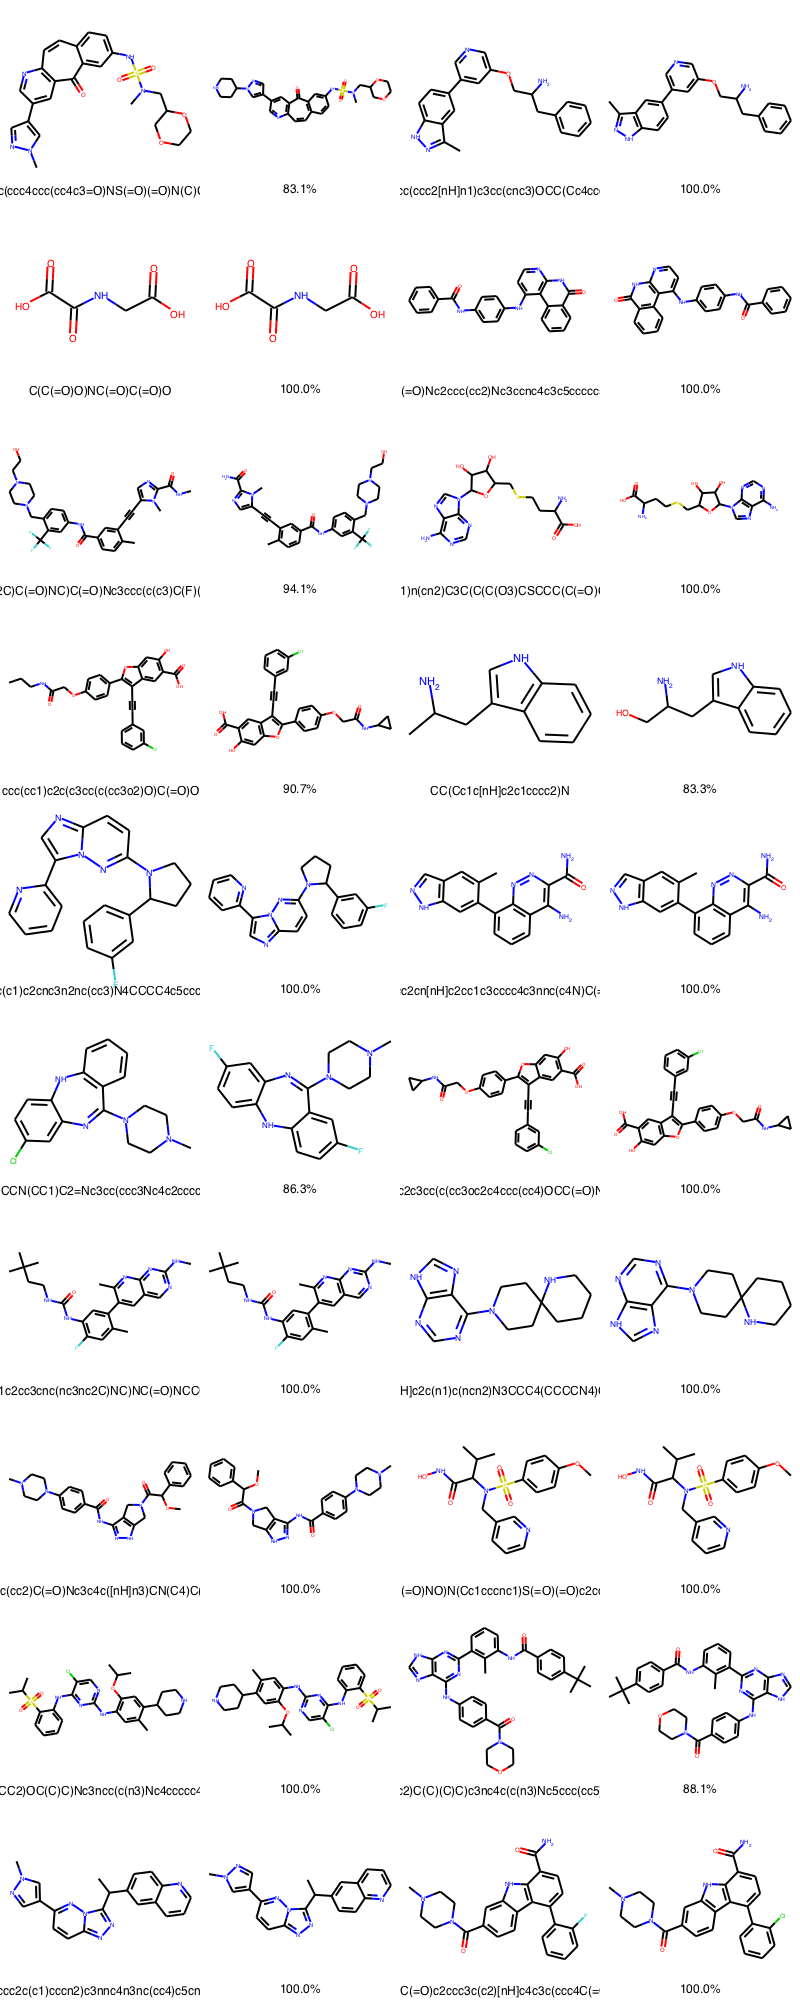

In [8]:
Draw.MolsToGridImage(pairs, molsPerRow=4, legends=legends)

# Check Structure

In [9]:
pc_dic = {}
for idx, row in df.iterrows():
    arr = pc_dic.get(row["CPD_1_SMILES"], [])
    arr.append(row)
    pc_dic[row["CPD_1_SMILES"]] = arr


In [16]:
def chemblid2prefname(chemblid):
    r = chembldb.query(Target).filter_by(chembl_id=chemblid).first()
    if r is not None:
        return r.pref_name
    else:
        return "??"

16


469


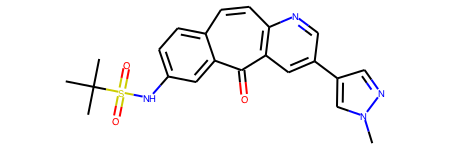

470


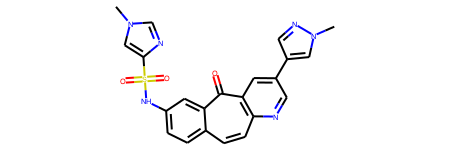

471


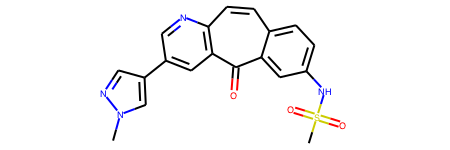

472


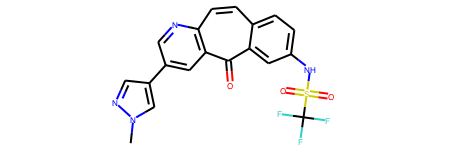

473


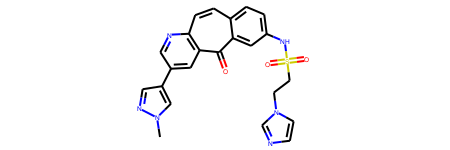

474


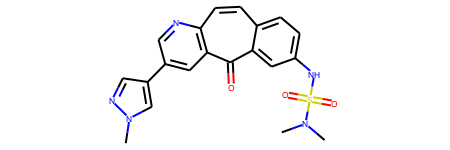

475


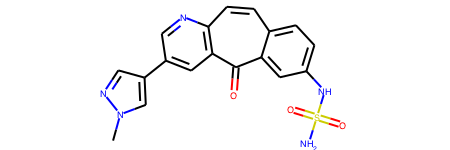

476


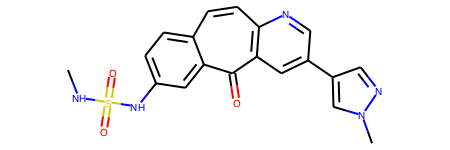

477


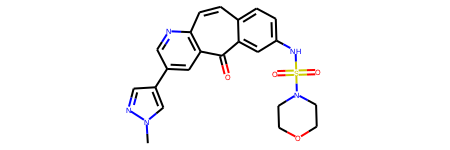

478


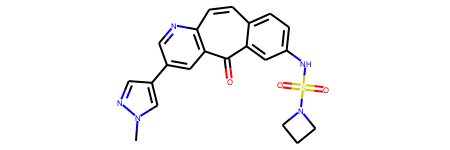

479


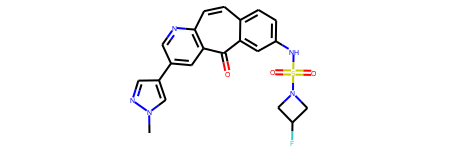

480


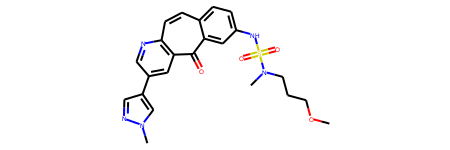

481


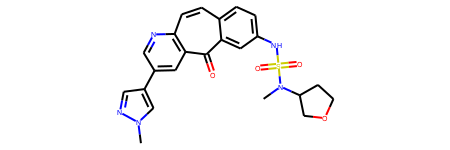

482


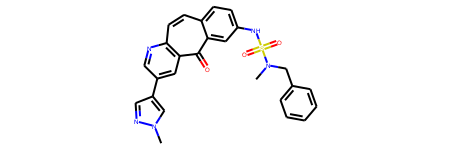

483


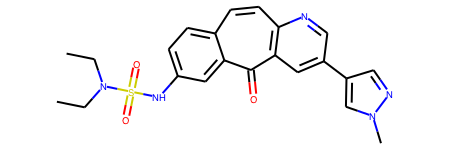

484


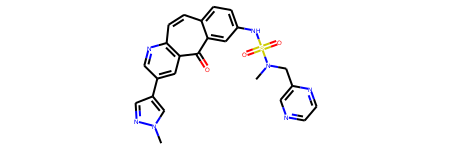

485


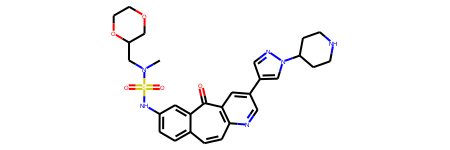

486


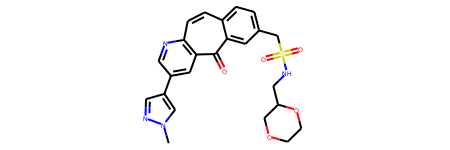

487


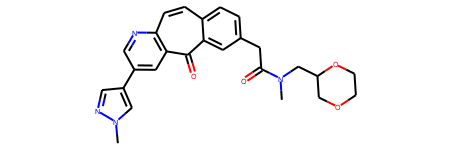

12


216


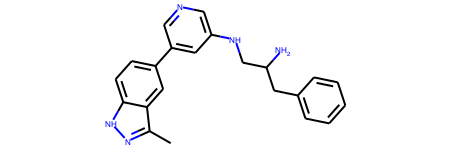

217


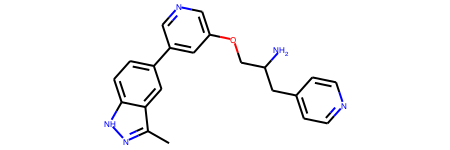

218


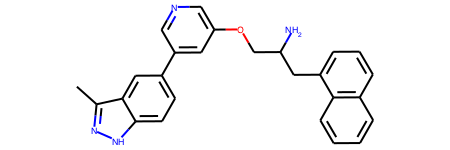

219


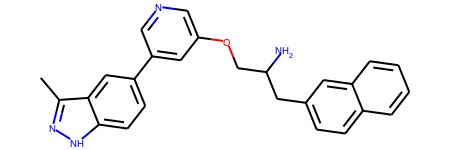

220


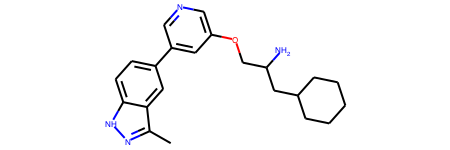

221


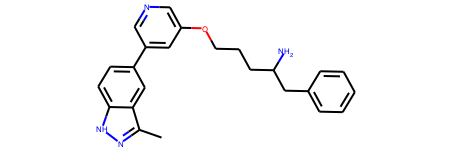

222


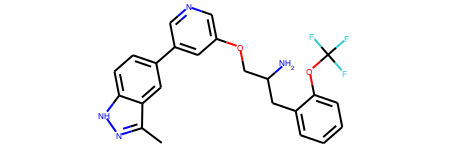

223


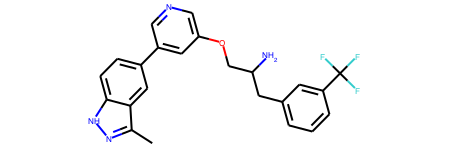

224


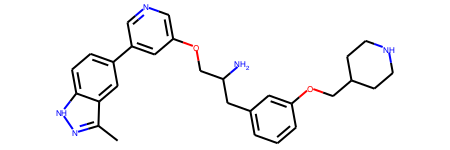

225


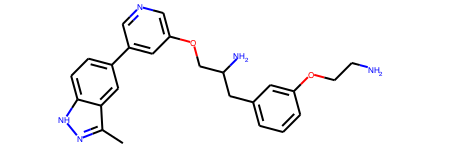

226


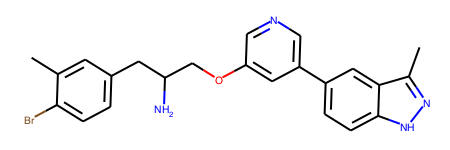

227


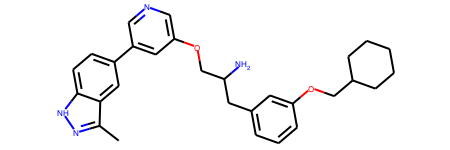

228


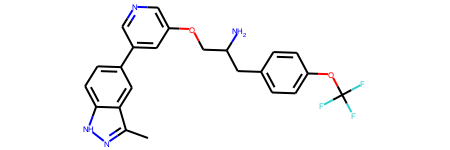

229


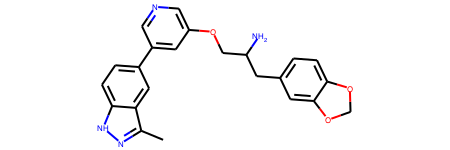

230


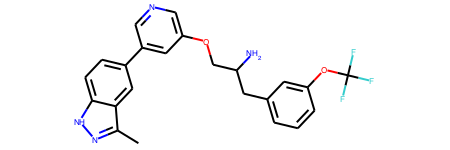

231


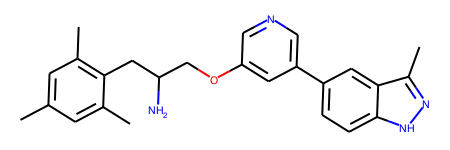

232


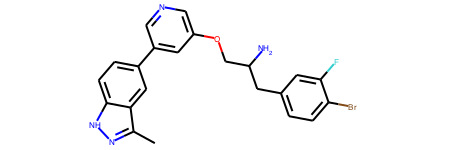

233


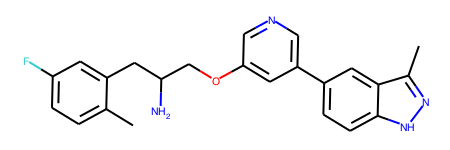

234


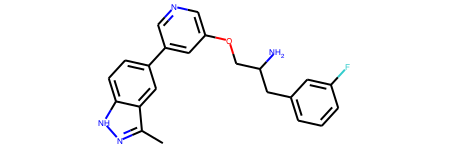

235


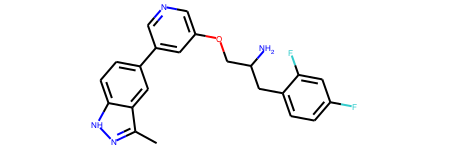

236


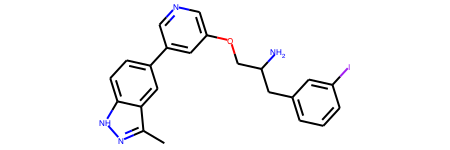

237


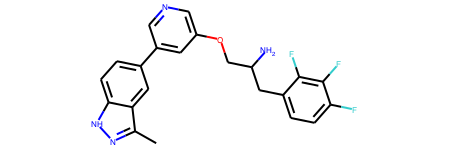

238


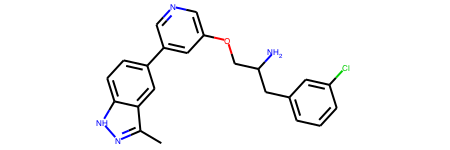

239


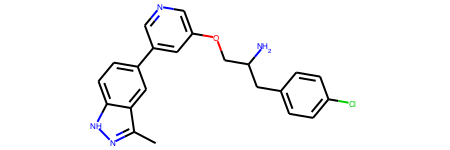

240


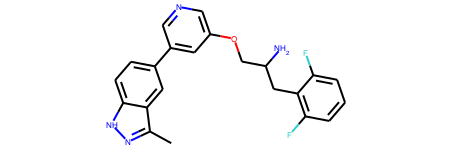

241


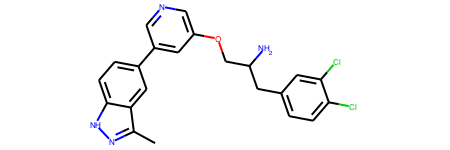

242


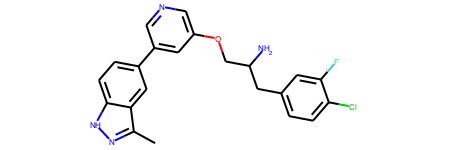

243


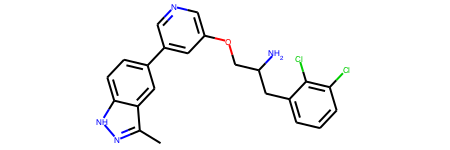

244


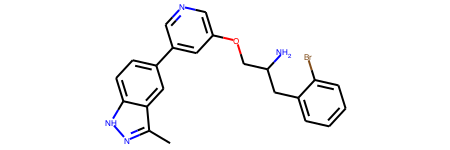

245


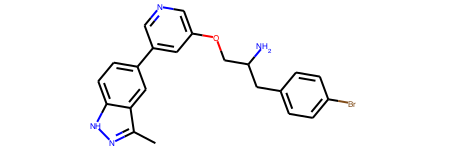

246


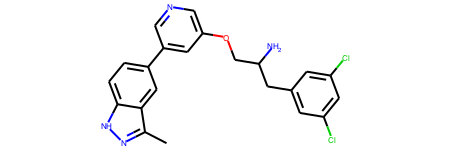

247


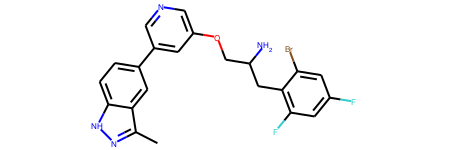

248


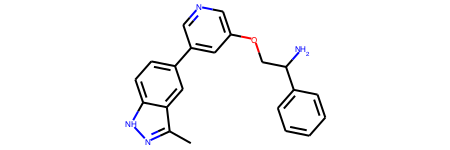

249


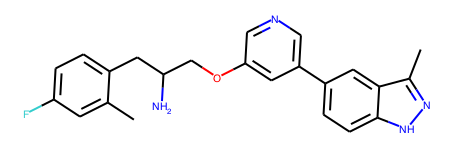

250


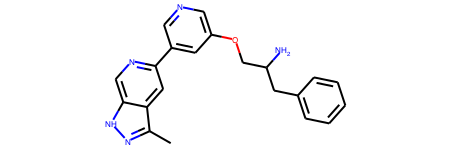

251


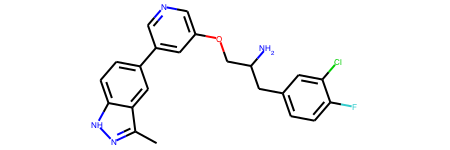

252


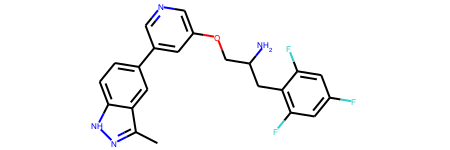

253


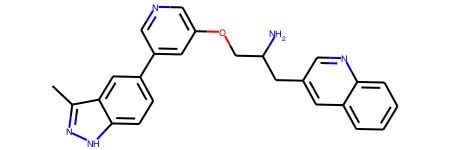

254


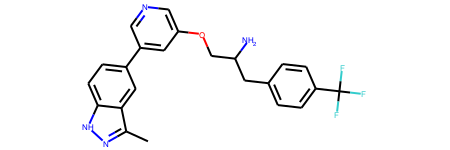

255


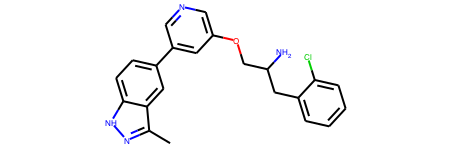

256


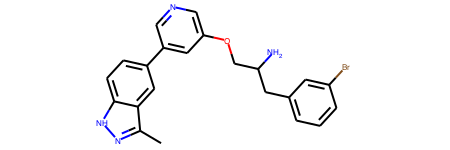

257


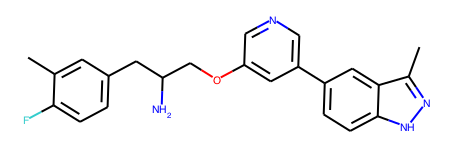

258


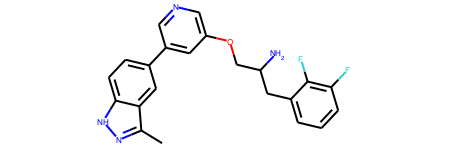

259


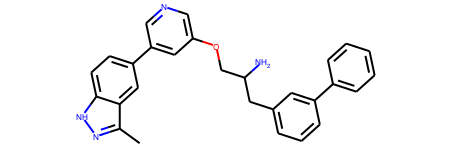

260


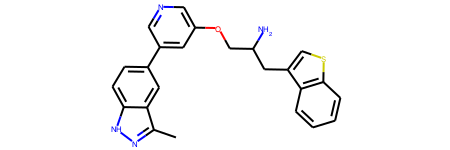

261


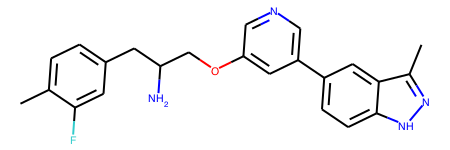

262


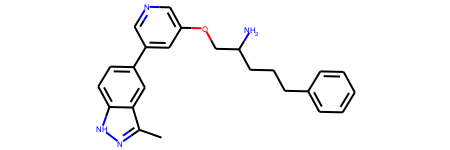

263


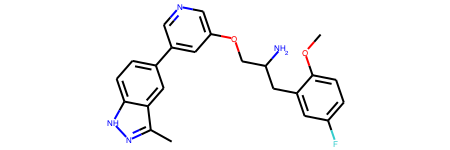

264


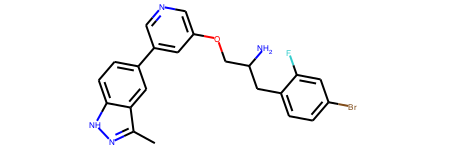

265


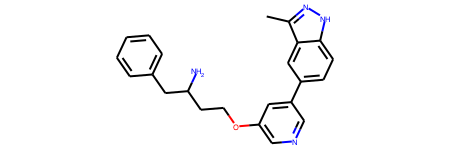

11


1


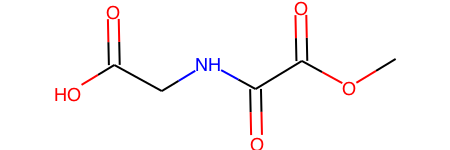

2


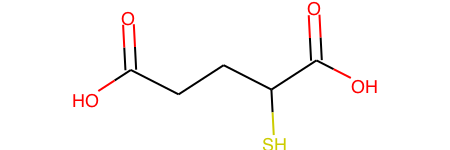

3


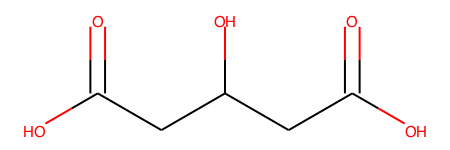

4


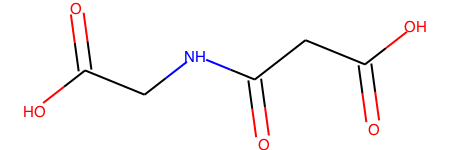

5


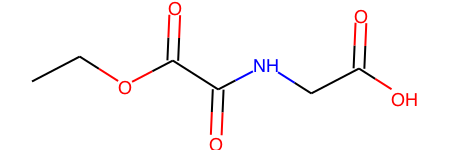

6


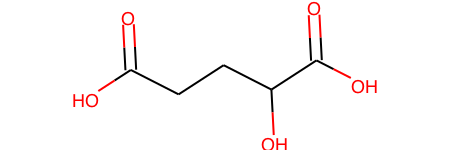

12


271


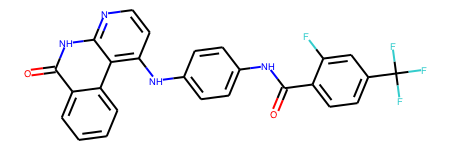

272


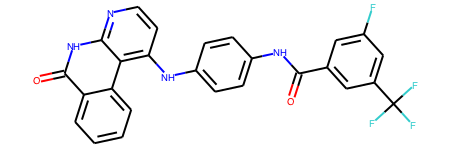

303


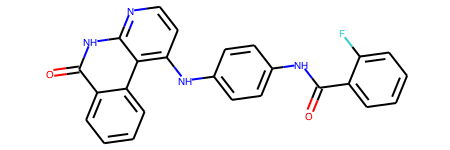

304


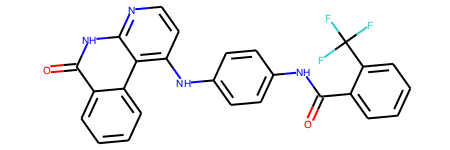

305


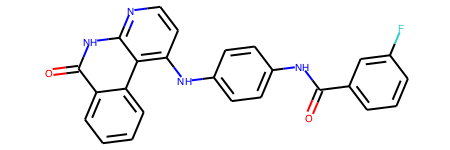

306


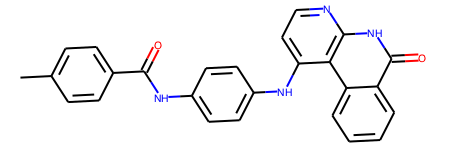

307


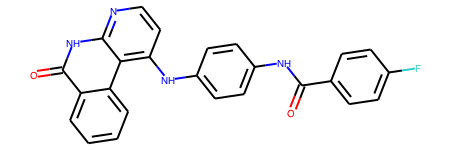

308


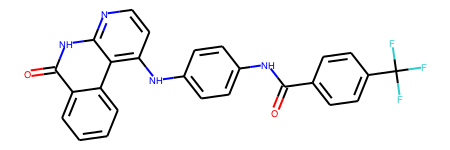

309


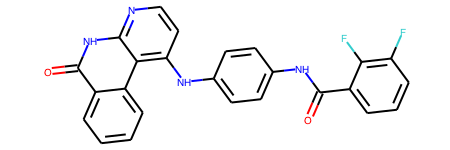

310


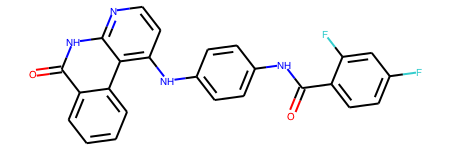

311


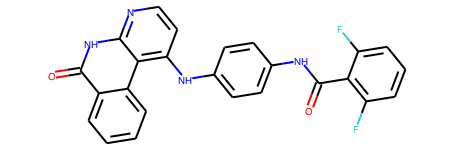

312


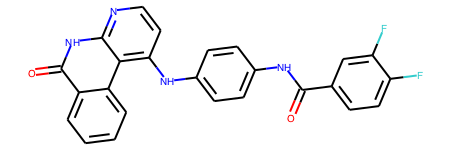

313


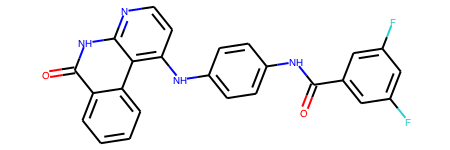

314


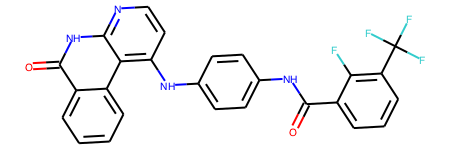

315


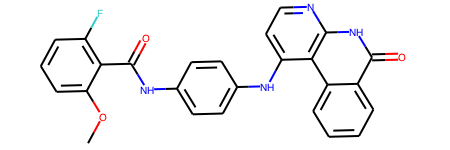

316


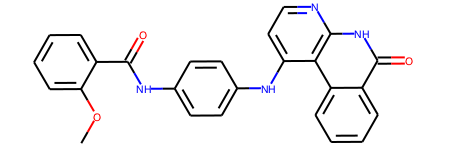

317


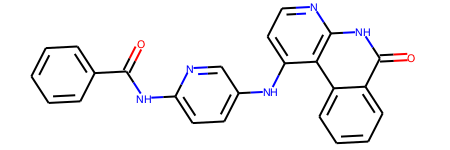

318


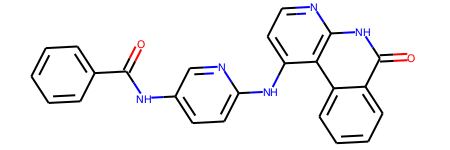

319


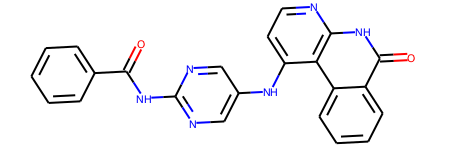

21


714


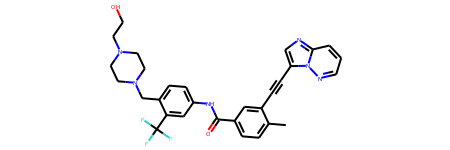

715


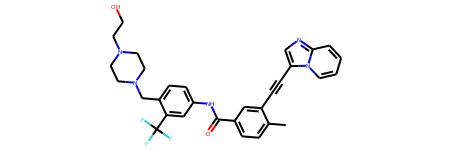

716


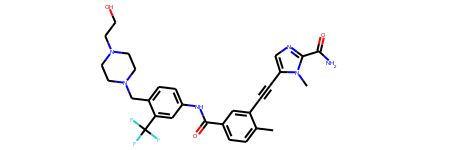

717


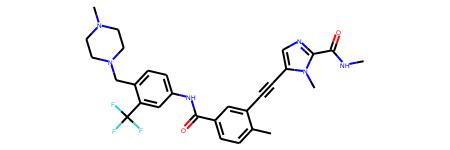

718


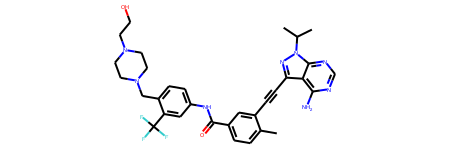

16


488


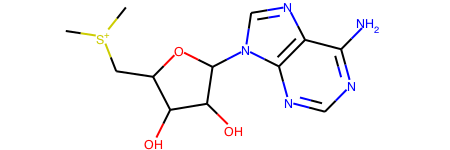

489


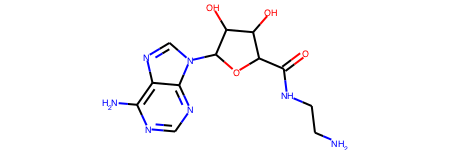

490


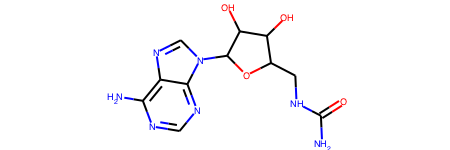

491


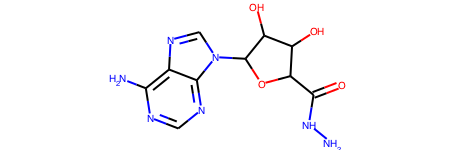

492


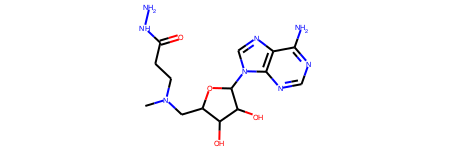

493


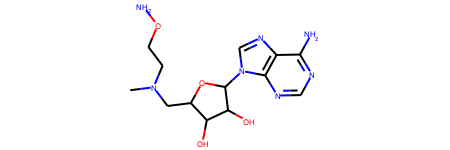

494


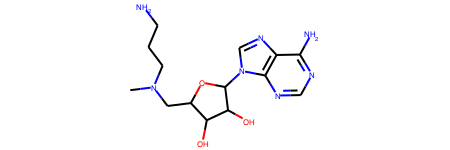

495


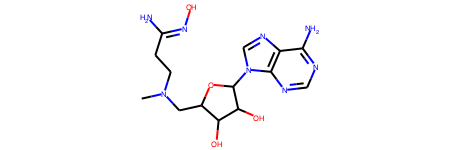

496


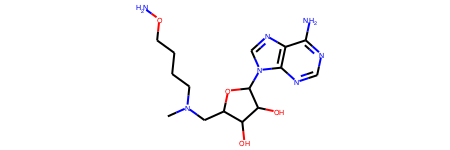

497


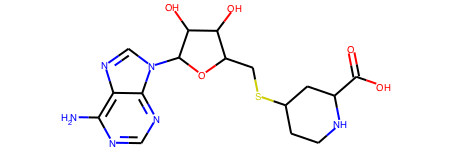

498


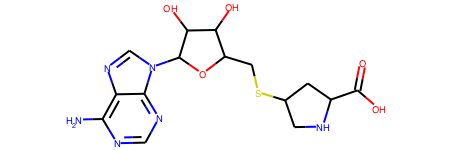

499


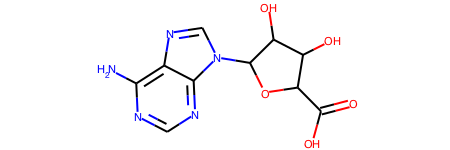

500


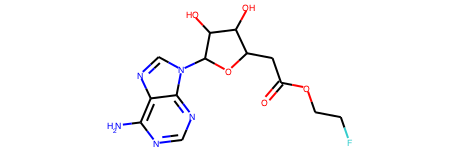

501


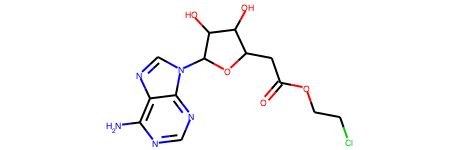

502


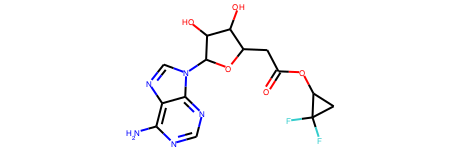

503


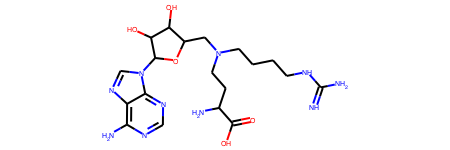

504


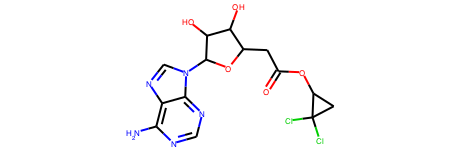

505


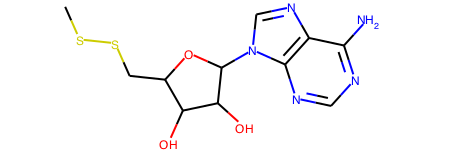

506


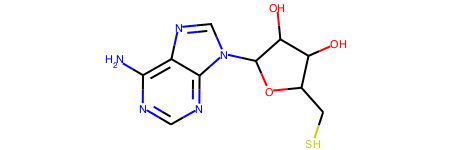

507


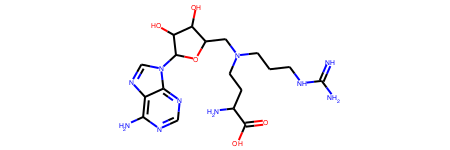

508


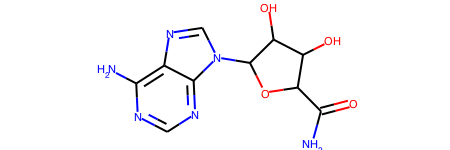

509


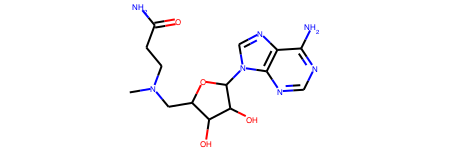

510


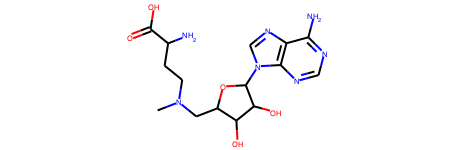

511


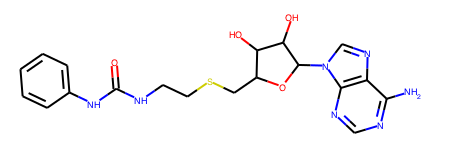

512


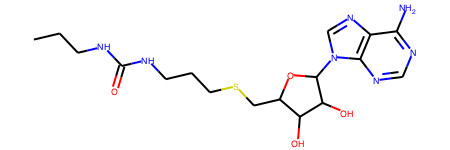

513


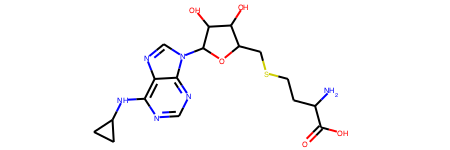

514


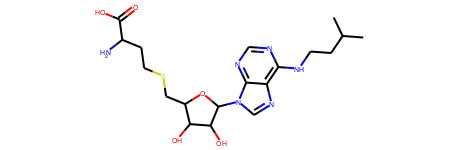

515


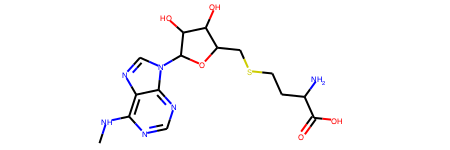

516


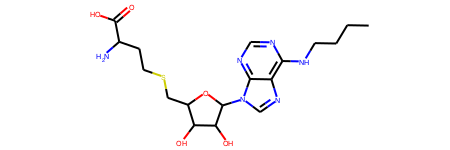

517


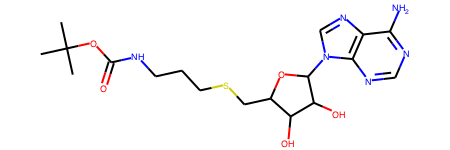

518


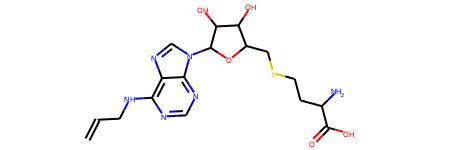

519


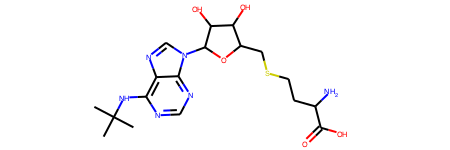

520


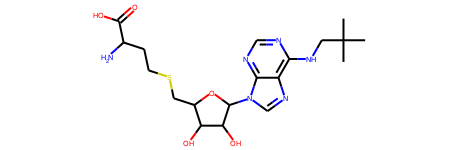

521


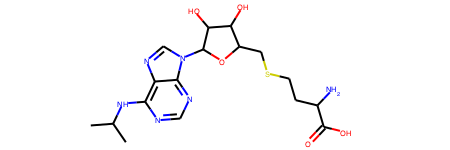

522


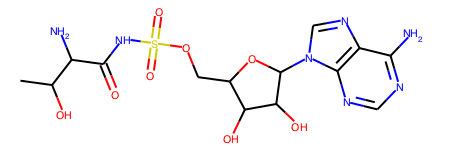

523


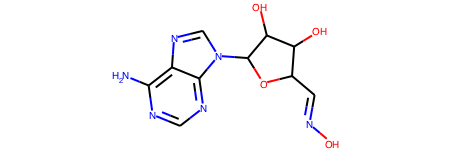

524


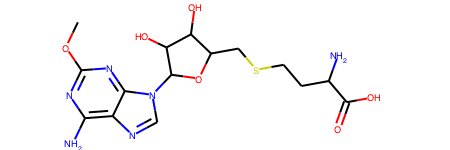

525


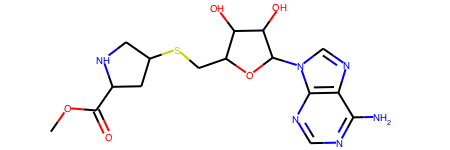

526


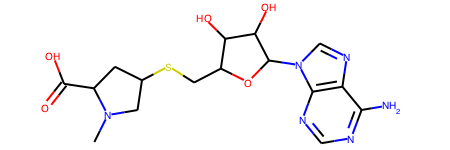

527


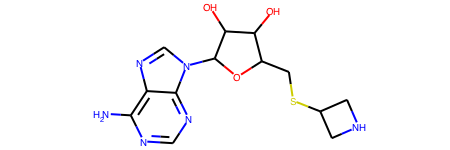

528


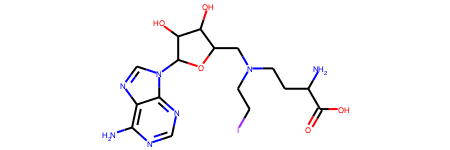

529


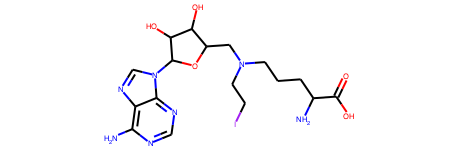

530


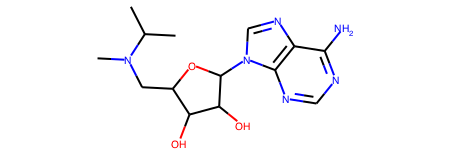

531


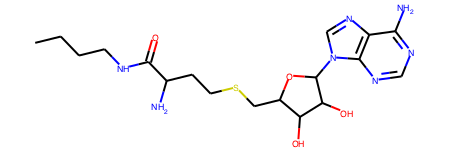

532


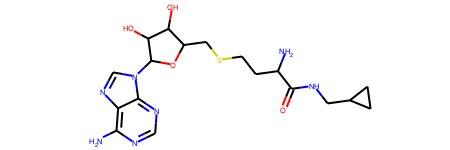

533


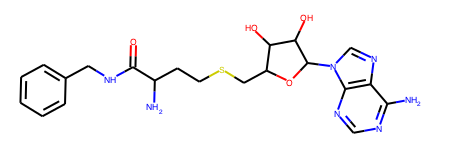

534


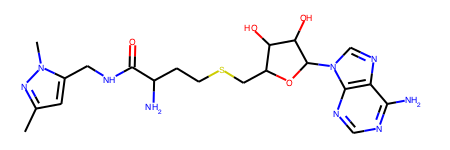

535


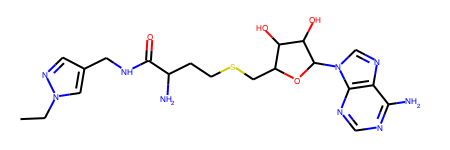

536


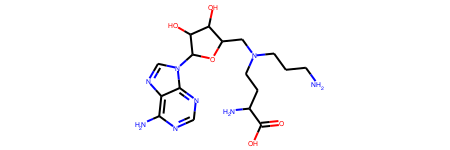

537


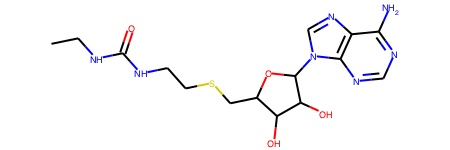

556


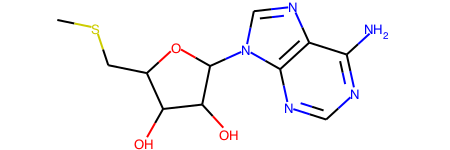

557


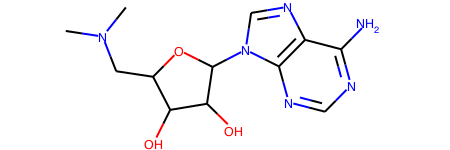

558


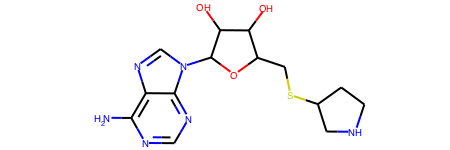

559


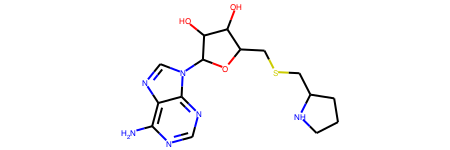

560


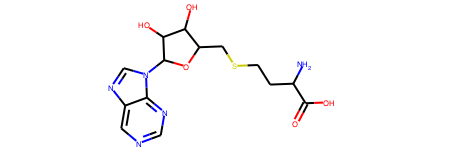

561


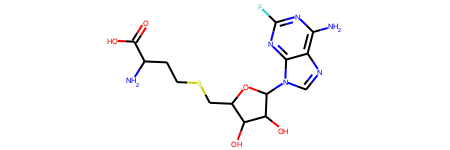

562


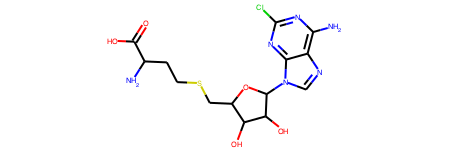

563


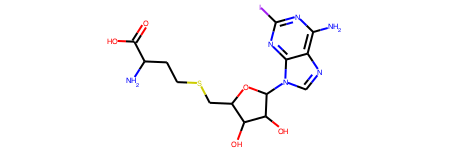

564


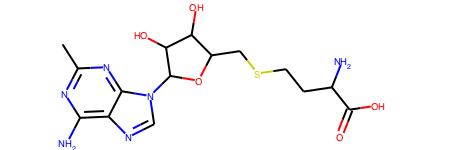

565


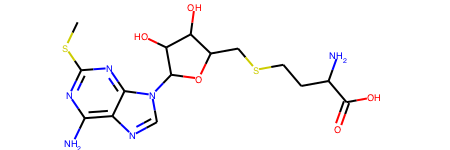

566


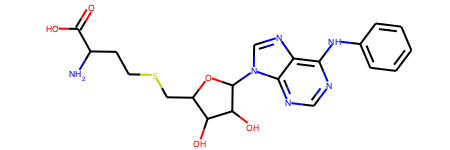

567


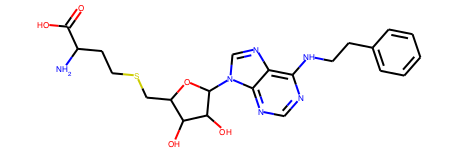

568


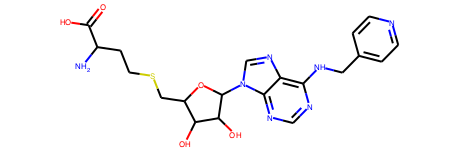

569


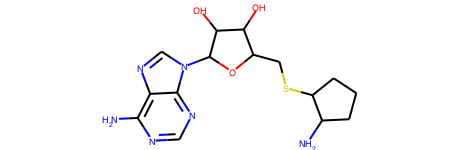

570


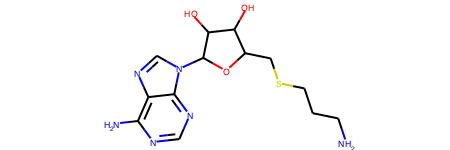

571


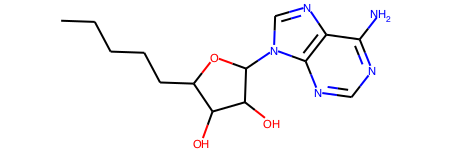

572


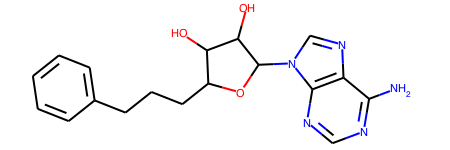

574


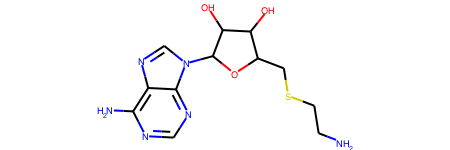

575


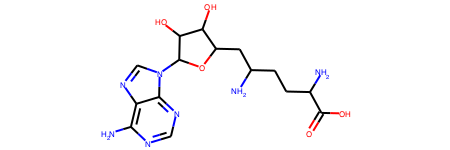

576


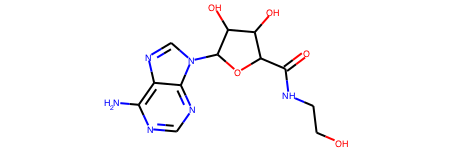

577


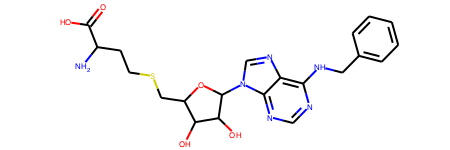

578


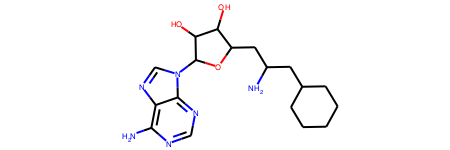

579


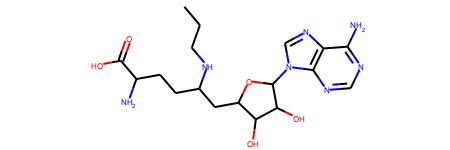

18


633


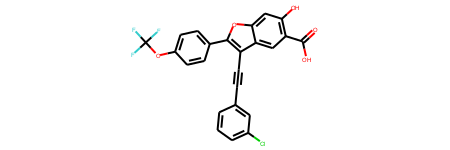

634


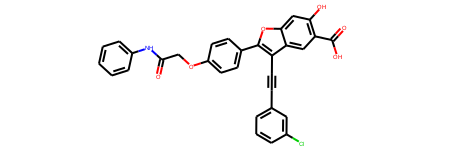

635


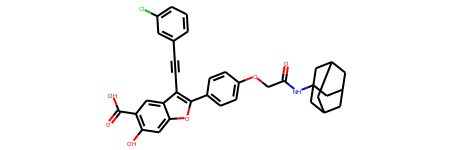

636


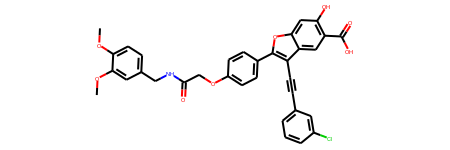

637


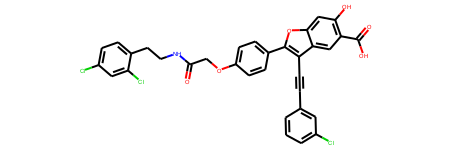

638


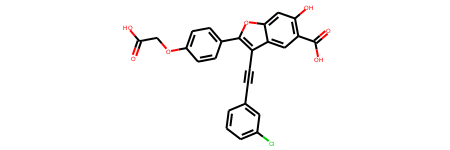

689


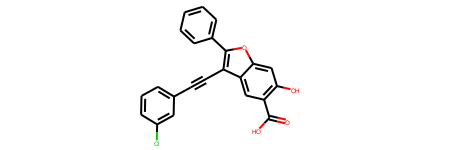

13


330


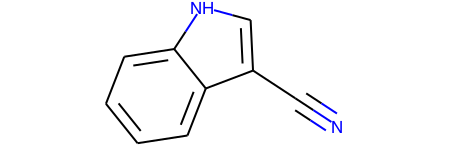

331


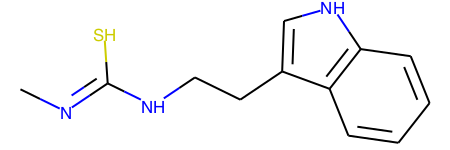

332


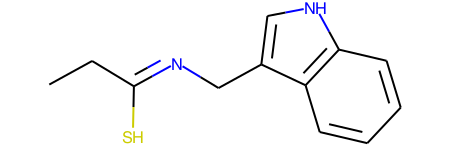

333


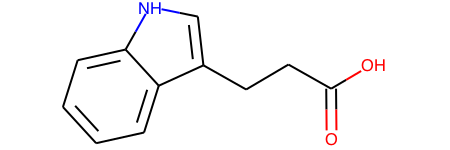

334


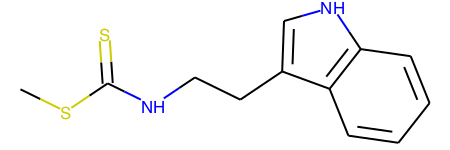

335


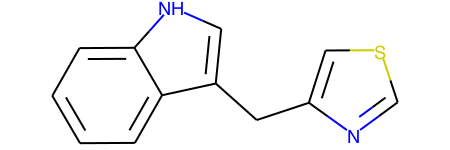

336


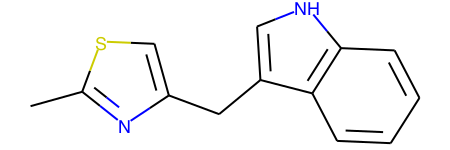

337


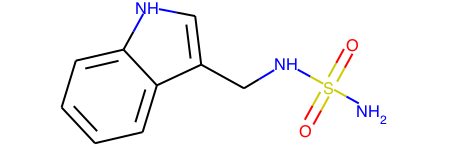

347


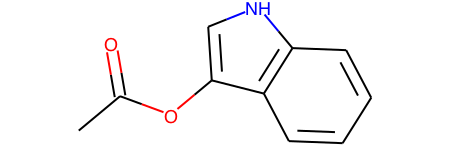

17


632


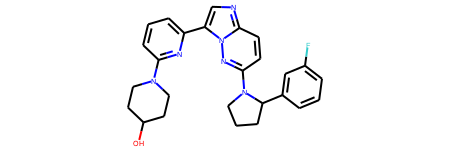

13


348


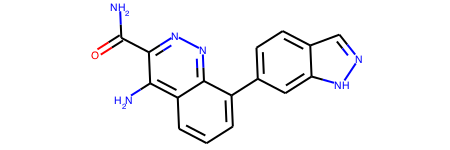

38


766


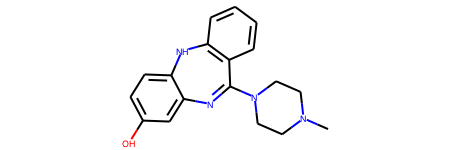

767


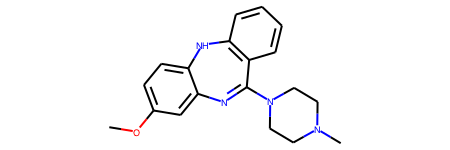

768


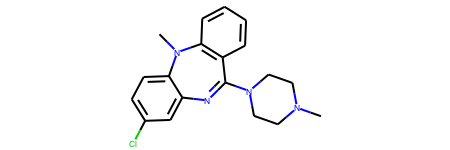

769


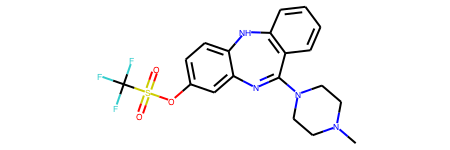

770


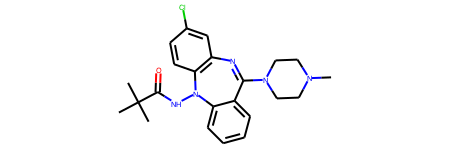

771


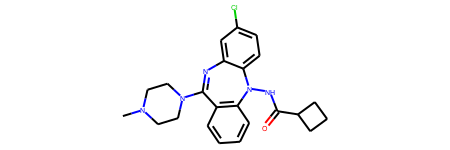

772


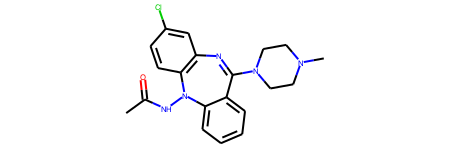

773


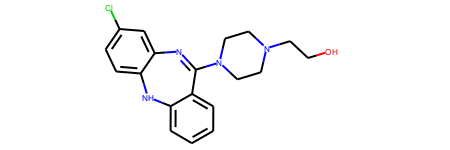

774


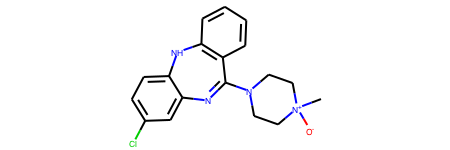

775


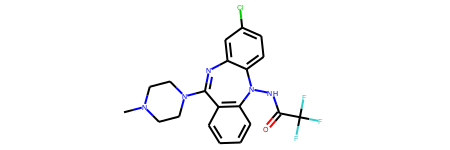

776


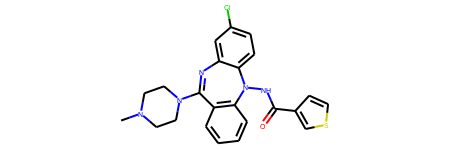

777


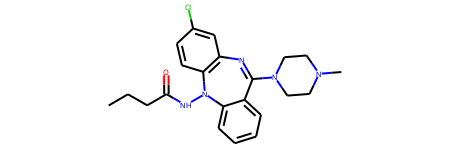

778


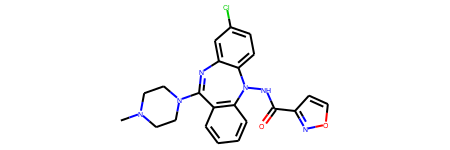

779


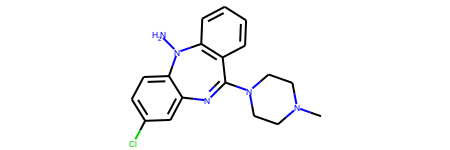

780


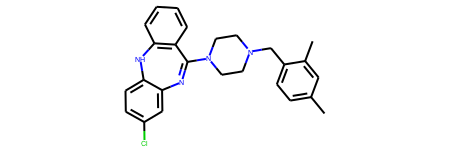

781


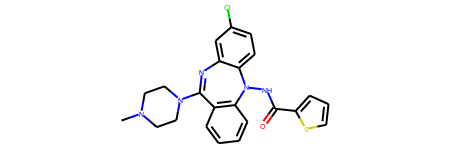

782


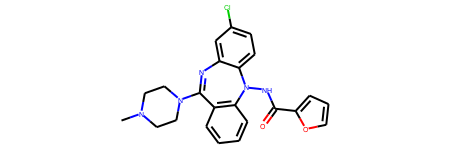

783


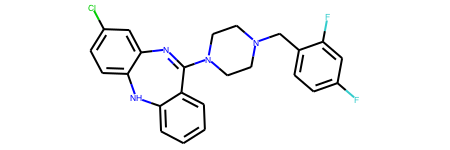

784


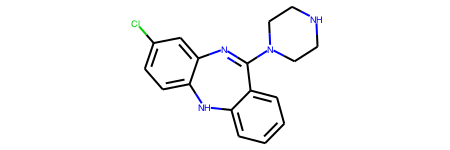

18


676


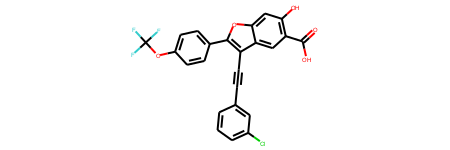

677


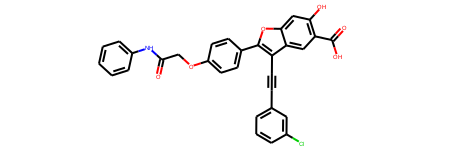

678


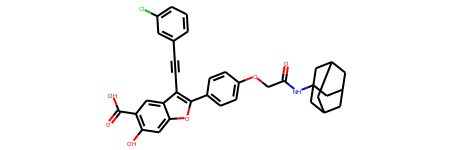

679


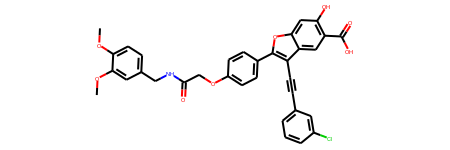

680


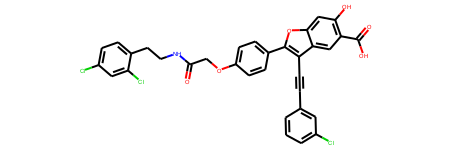

681


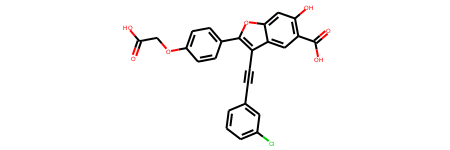

691


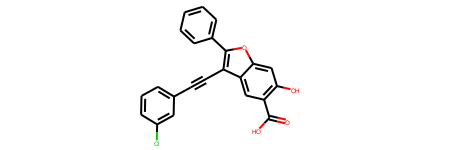

16


540


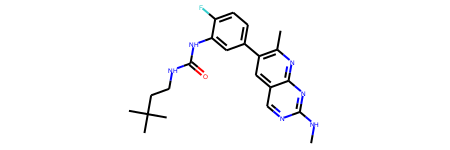

541


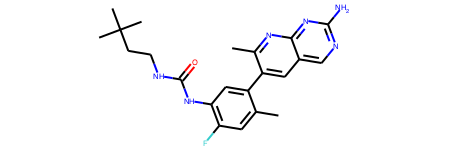

542


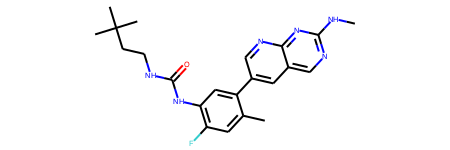

573


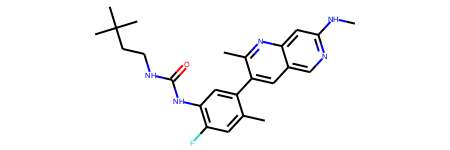

18


675


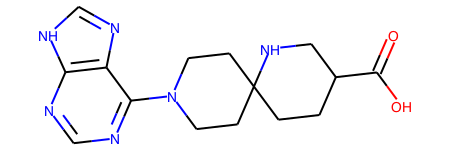

14


376


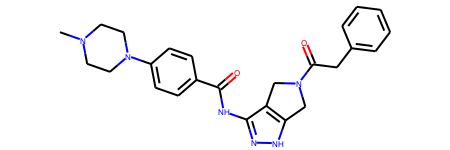

377


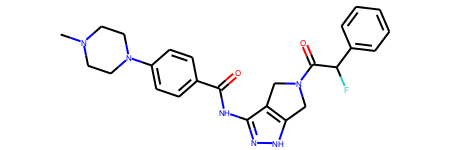

378


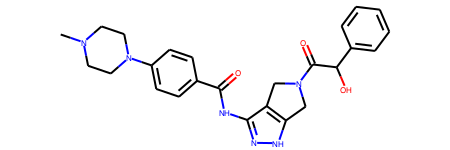

384


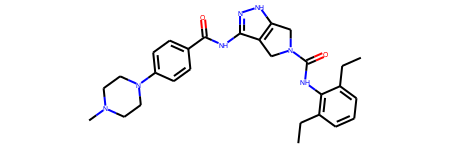

13


320


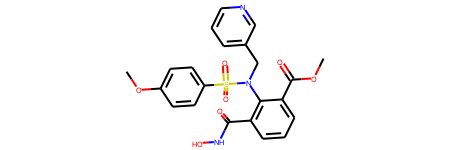

321


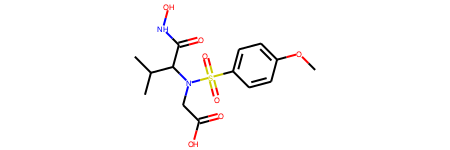

322


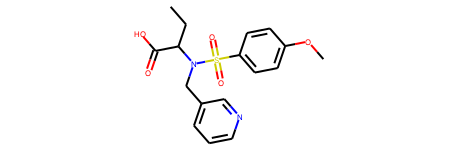

323


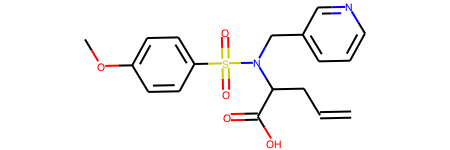

324


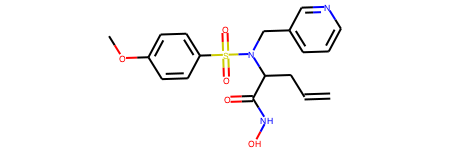

341


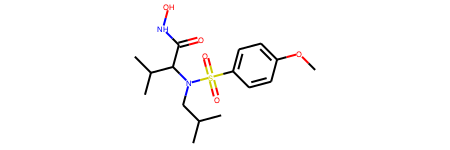

342


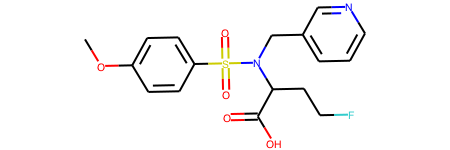

343


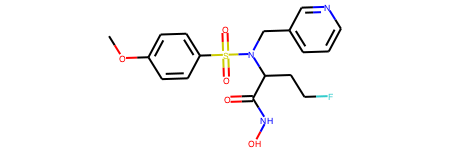

344


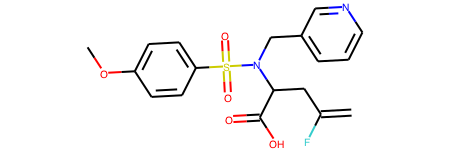

345


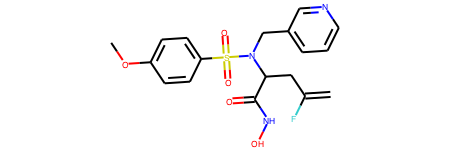

349


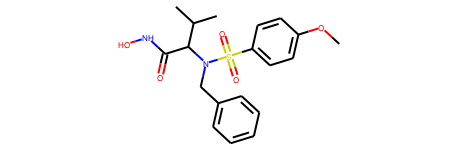

29


731


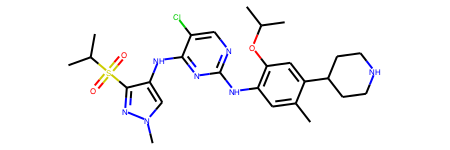

732


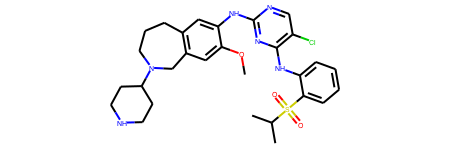

733


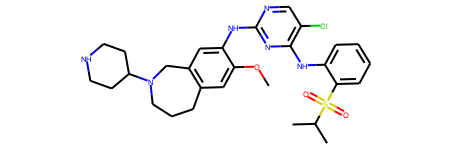

734


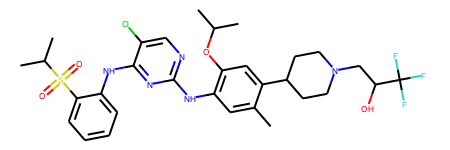

735


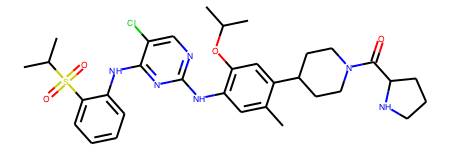

736


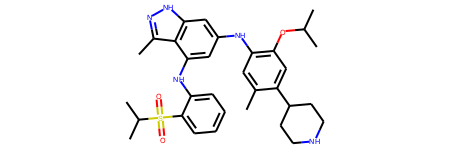

737


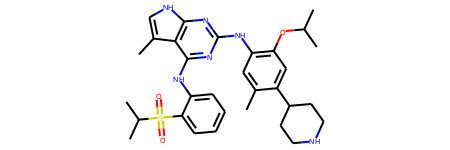

742


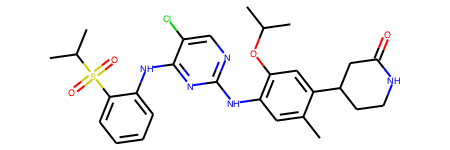

743


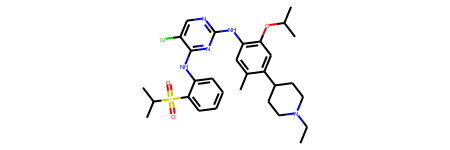

744


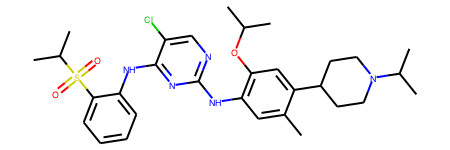

745


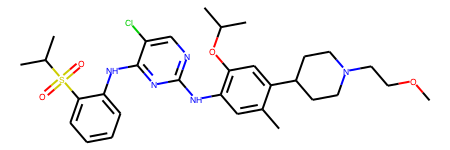

746


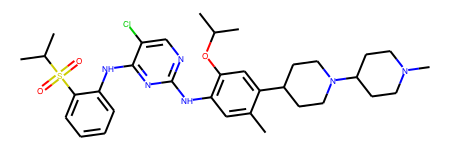

747


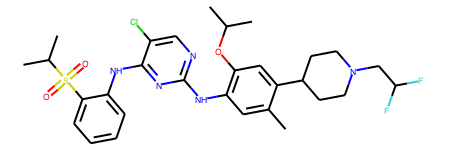

748


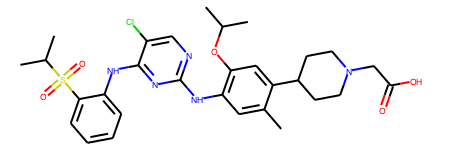

749


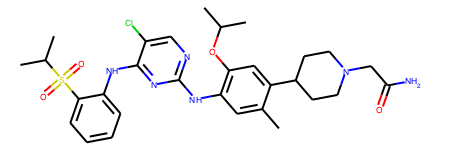

750


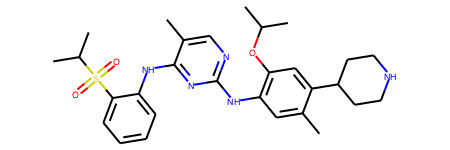

751


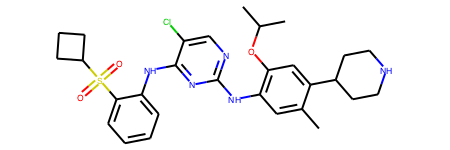

752


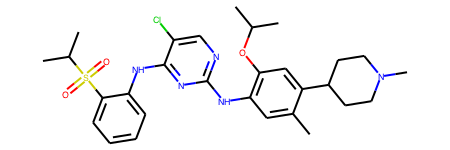

753


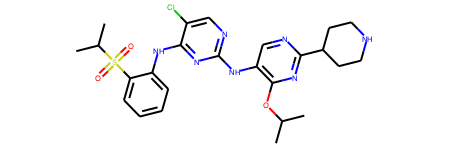

754


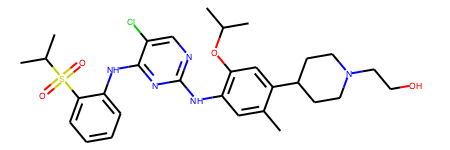

755


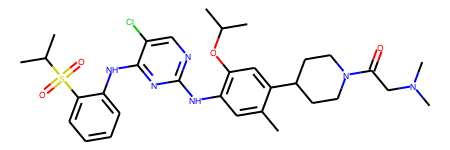

756


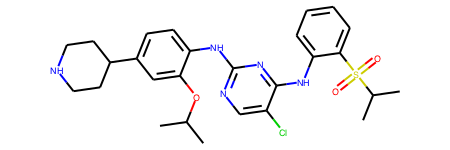

757


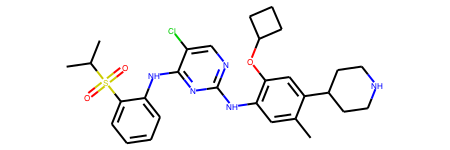

16


449


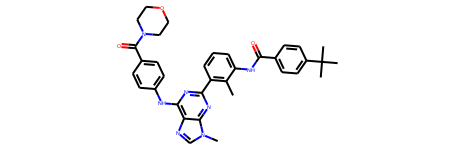

450


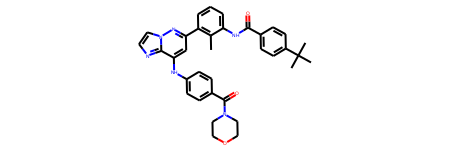

451


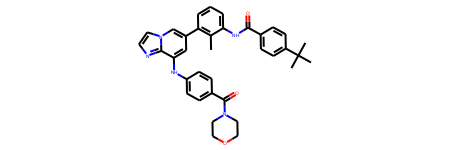

452


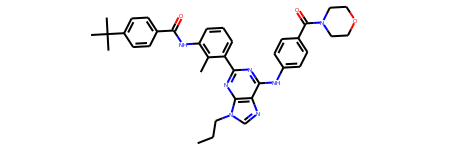

453


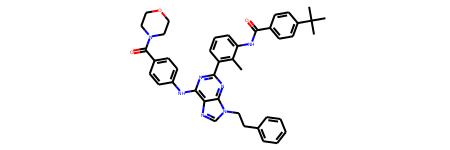

454


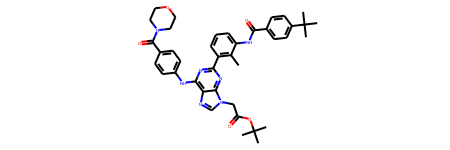

455


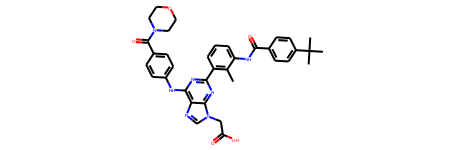

456


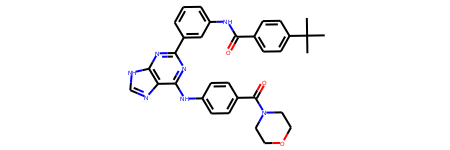

457


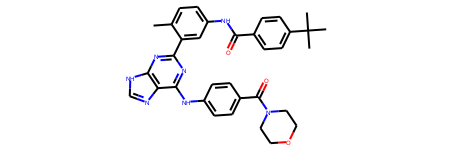

458


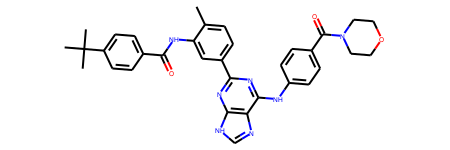

459


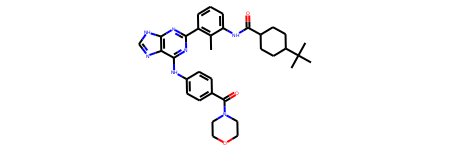

460


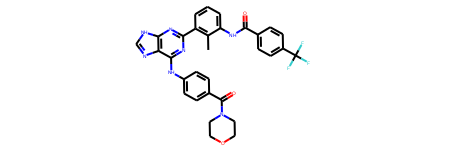

461


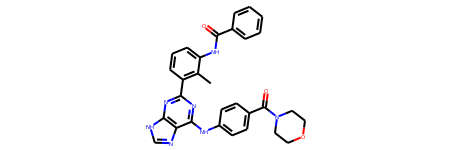

462


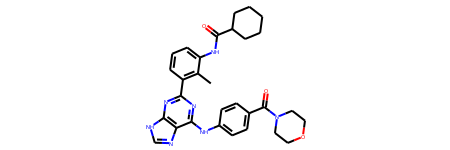

463


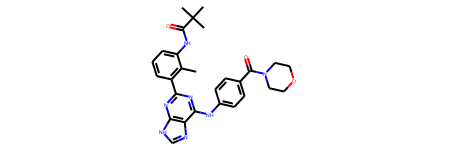

464


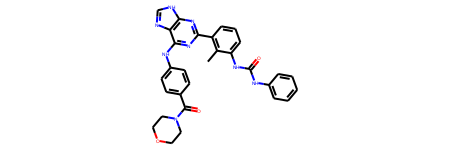

465


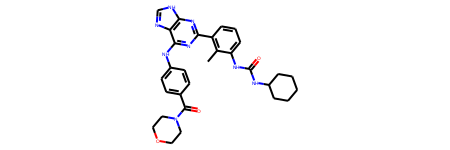

466


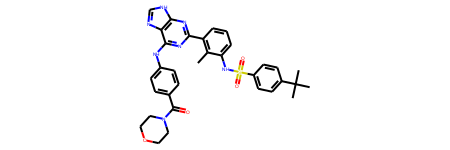

467


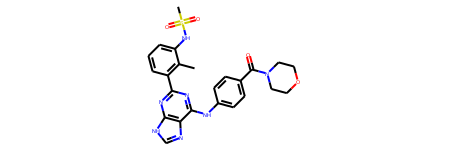

11


43


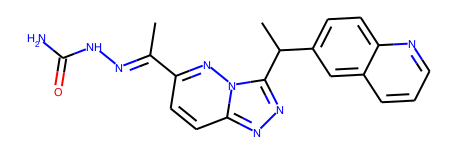

44


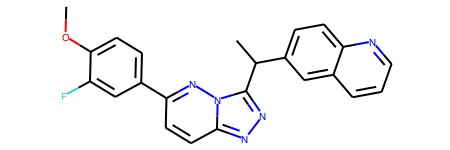

45


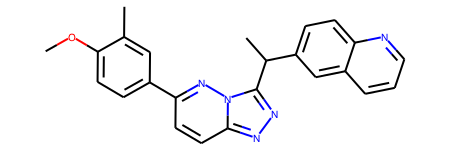

46


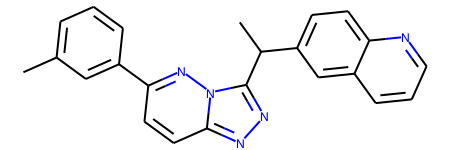

47


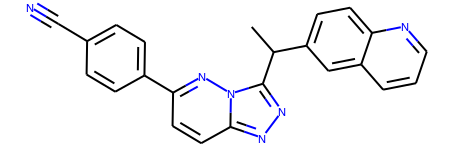

48


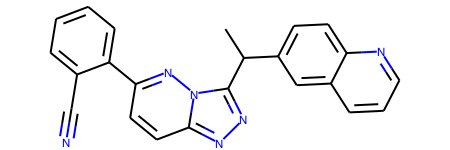

49


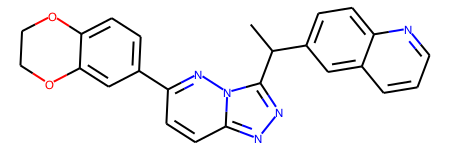

50


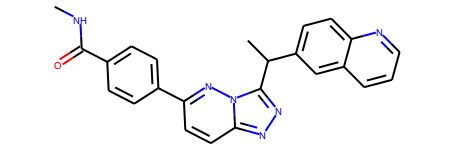

51


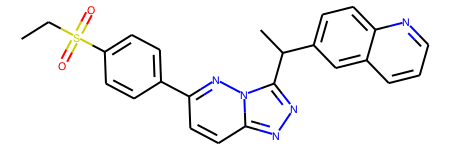

52


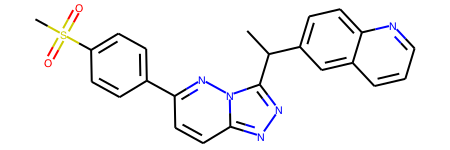

53


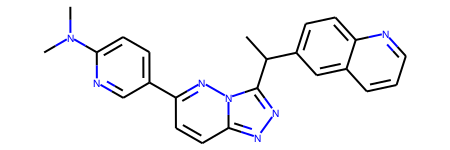

54


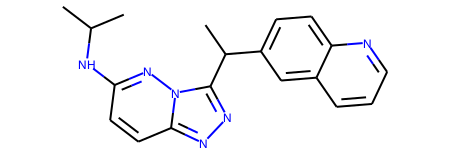

55


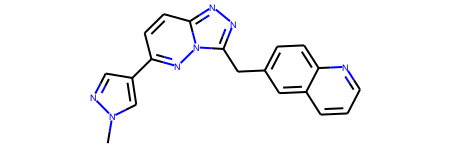

56


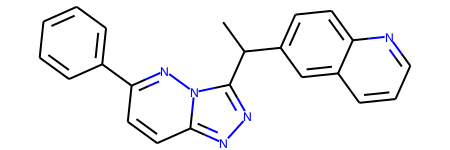

57


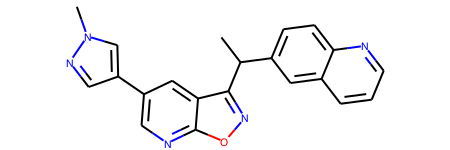

12


196


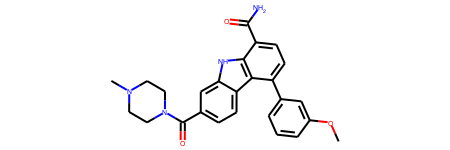

197


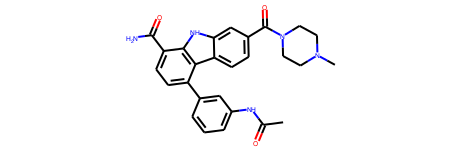

198


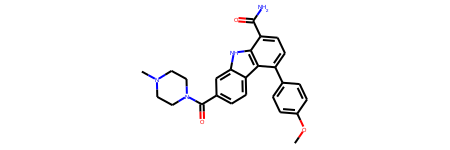

199


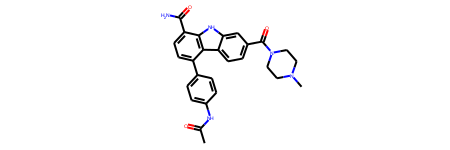

200


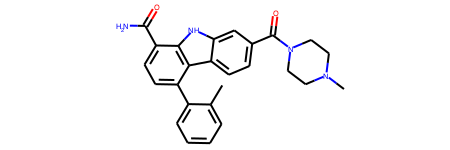

201


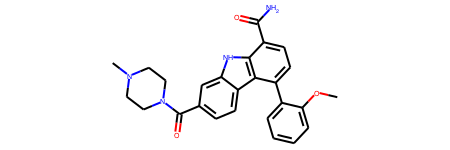

202


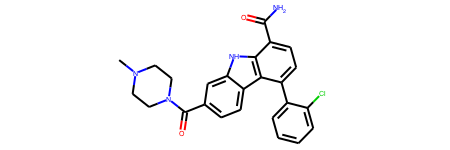

203


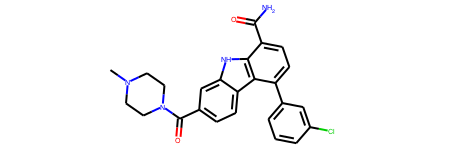

204


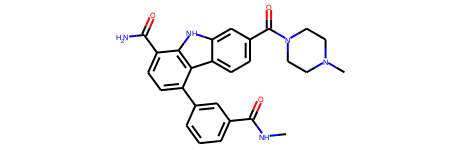

205


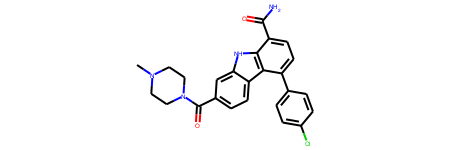

206


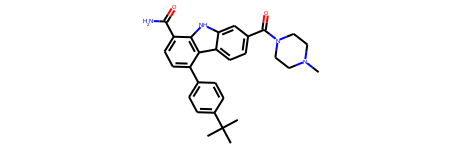

207


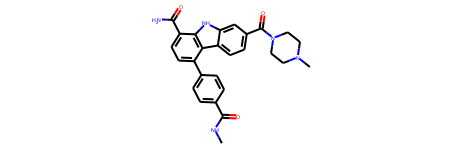

208


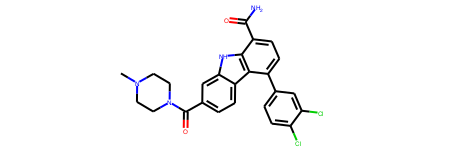

209


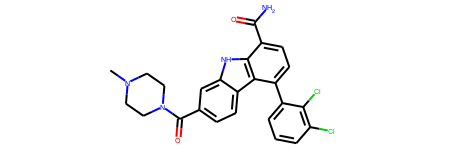

210


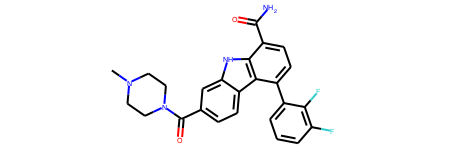

211


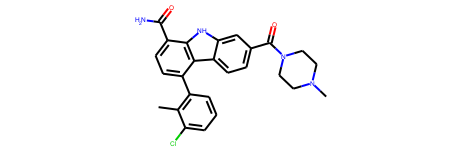

212


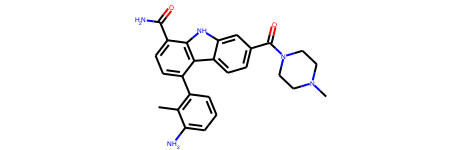

213


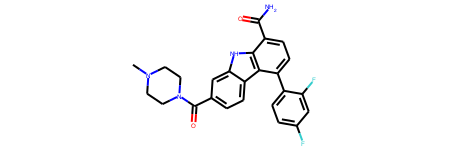

214


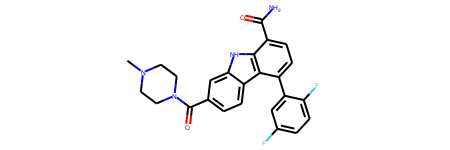

215


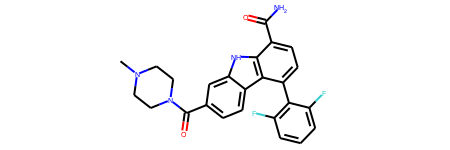

In [20]:
pc_mols = []
for k in keys:
    display(HTML('<h3>{0} (ligand ID: <a href="http://www4.rcsb.org/ligand/{1}">{1}</a>)<h3>'.format(k, ligdic[k])))
    l = pc_dic[k]
    for i, item in enumerate(l):
        if i == 0:
            print(item["CPD_1_PD"])
            display(HTML("<ul>"))
            for cid in item["CPD_1_ChEMBL_TARGETS"].split(","):
                cid = cid.strip()
                hstr = '<li><a href="https://www.ebi.ac.uk/chembl/target/inspect/{0}">{0} ({1})</a></li>'.format(cid, chemblid2prefname(cid))
                display(HTML(hstr))
            display(HTML("</ul>"))
        print(item["PromiscuityCliff_ID"])
        m = Chem.MolFromSmiles(item["CPD_2_SMILES"])
        display(m)